<a href="https://colab.research.google.com/github/nischala755/EV-Analysis/blob/main/pyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [2]:
import pandas as pd
import io

# Assuming the file is named 'Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(io.BytesIO(uploaded['Electric_Vehicle_Population_Data.csv']))

# Initial Data Exploration
print(df.head(5))         # Display the first 5 rows
print(df.columns)         # Display the column names
print(df.tail())          # Display the last 5 rows
print(df.info())          # Display DataFrame information
print(df.isnull().sum())  # Display the count of null values in each column


   VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel

In [5]:
# Check for missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values
median_year = df['Model Year'].median()
df['Model Year'] = df['Model Year'].fillna(median_year)
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
median_range = df['Electric Range'].median()
df['Electric Range'] = df['Electric Range'].fillna(median_range)
median_msrp = df['Base MSRP'].median()
df['Base MSRP'] = df['Base MSRP'].fillna(median_msrp)
df = df.dropna(subset=['State'])


Missing values before cleaning:
VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0

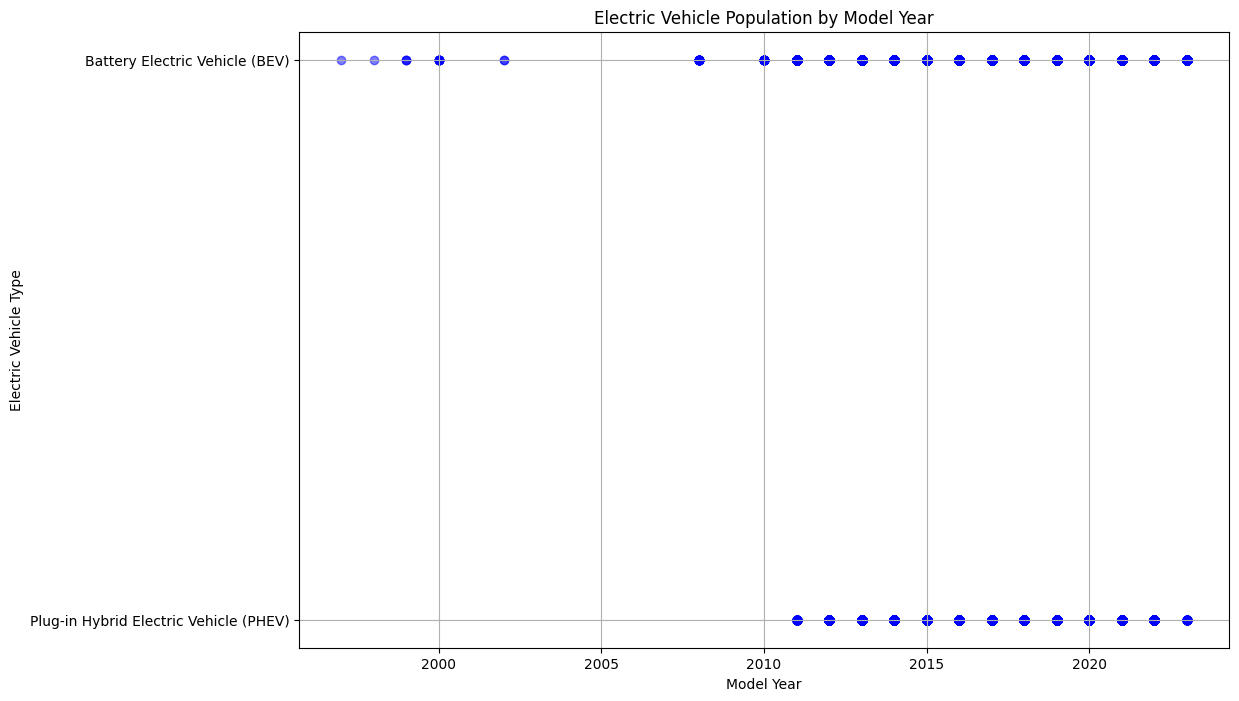

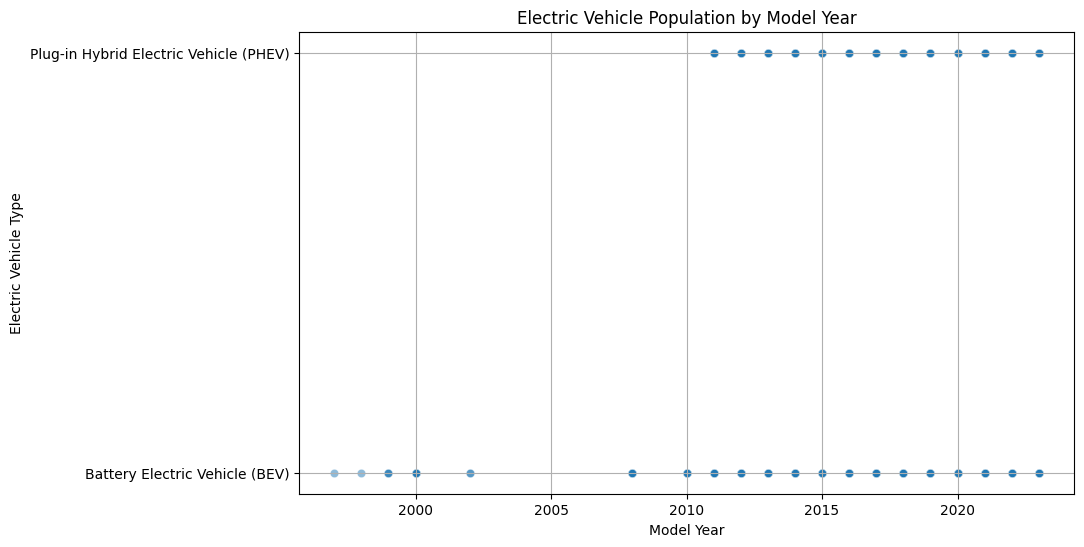

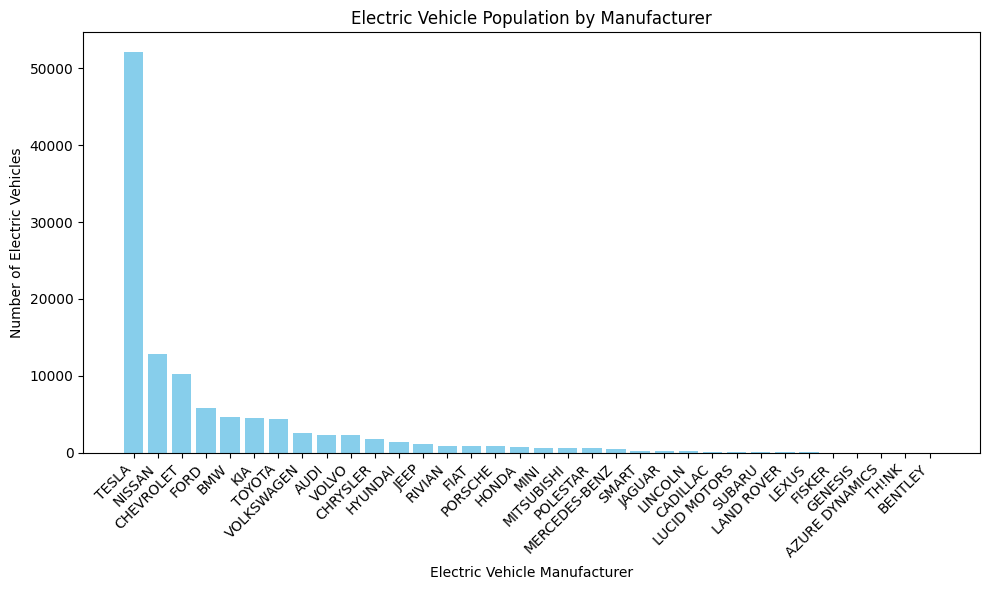

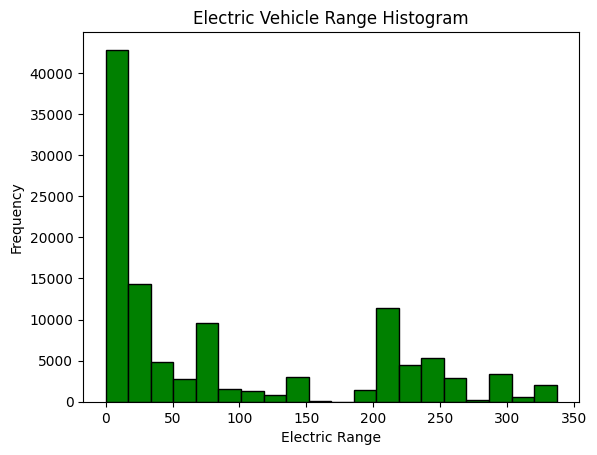

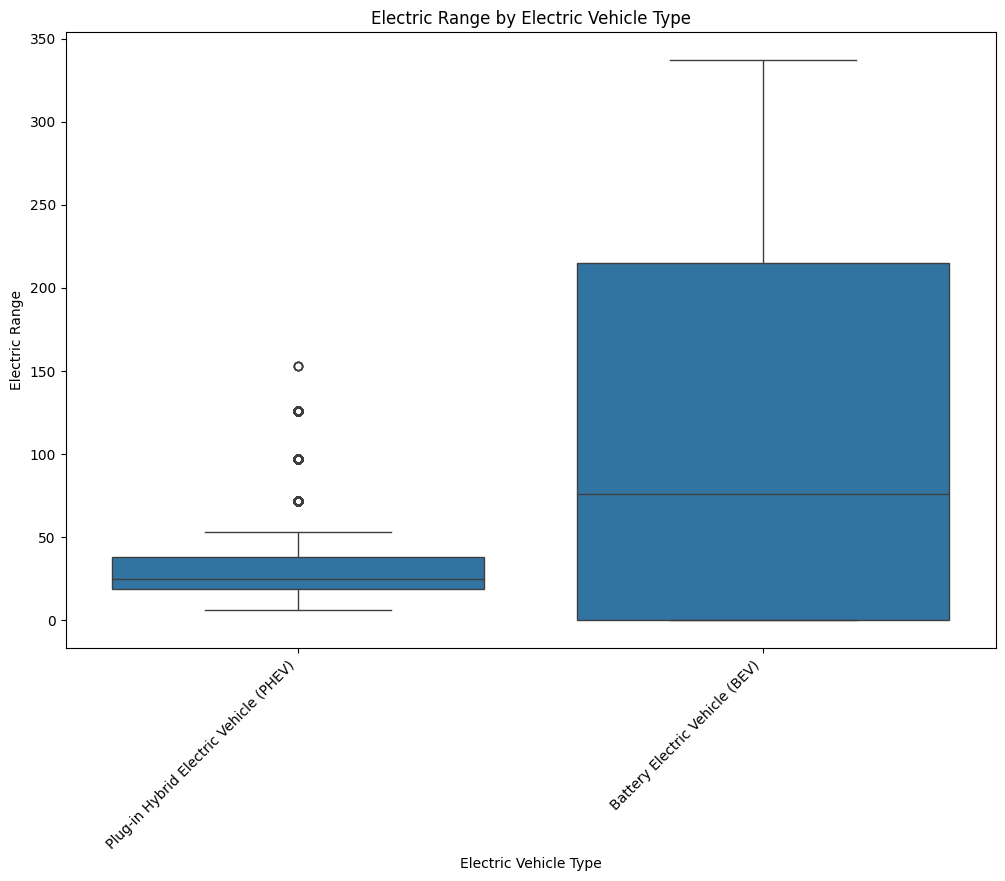

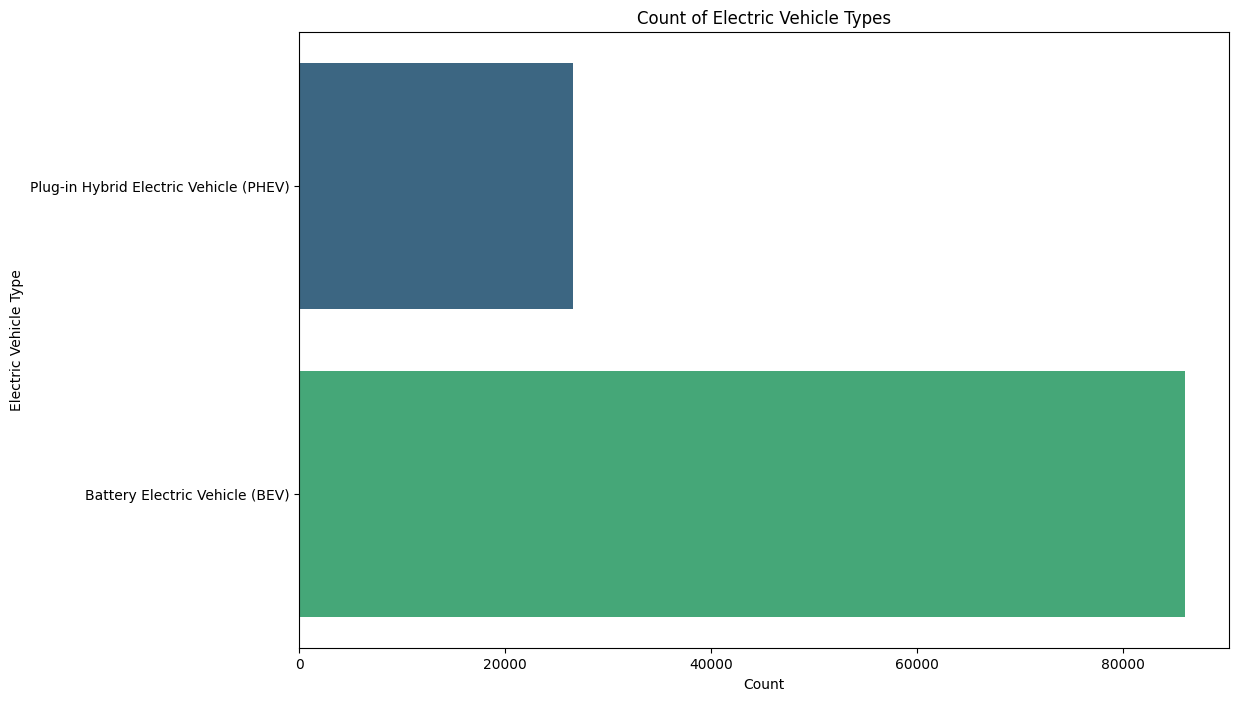

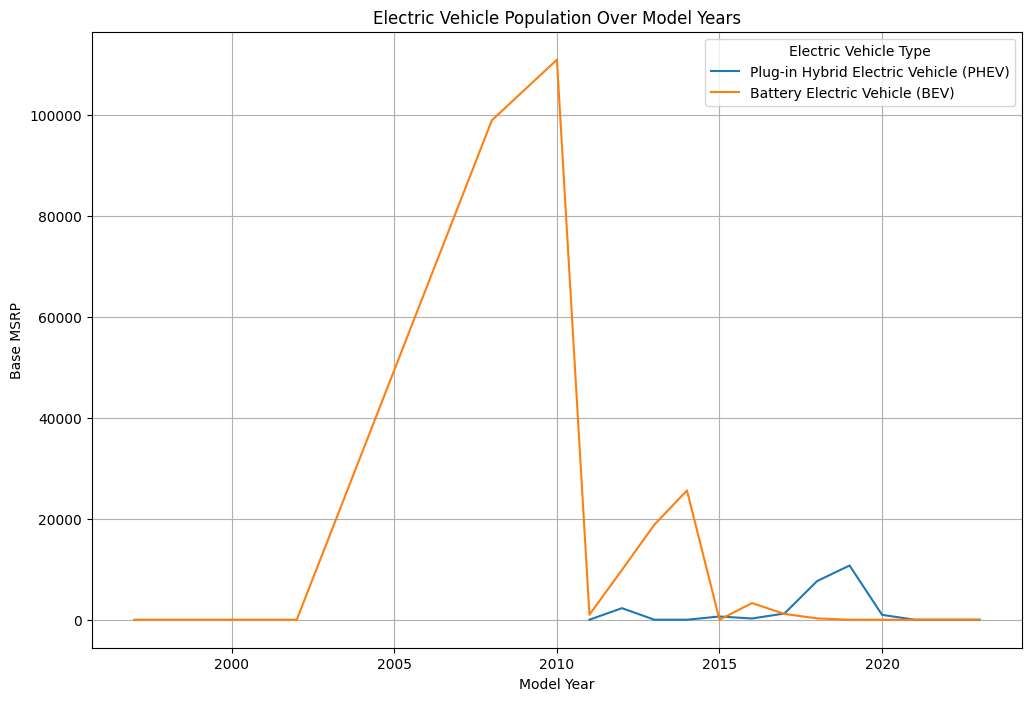

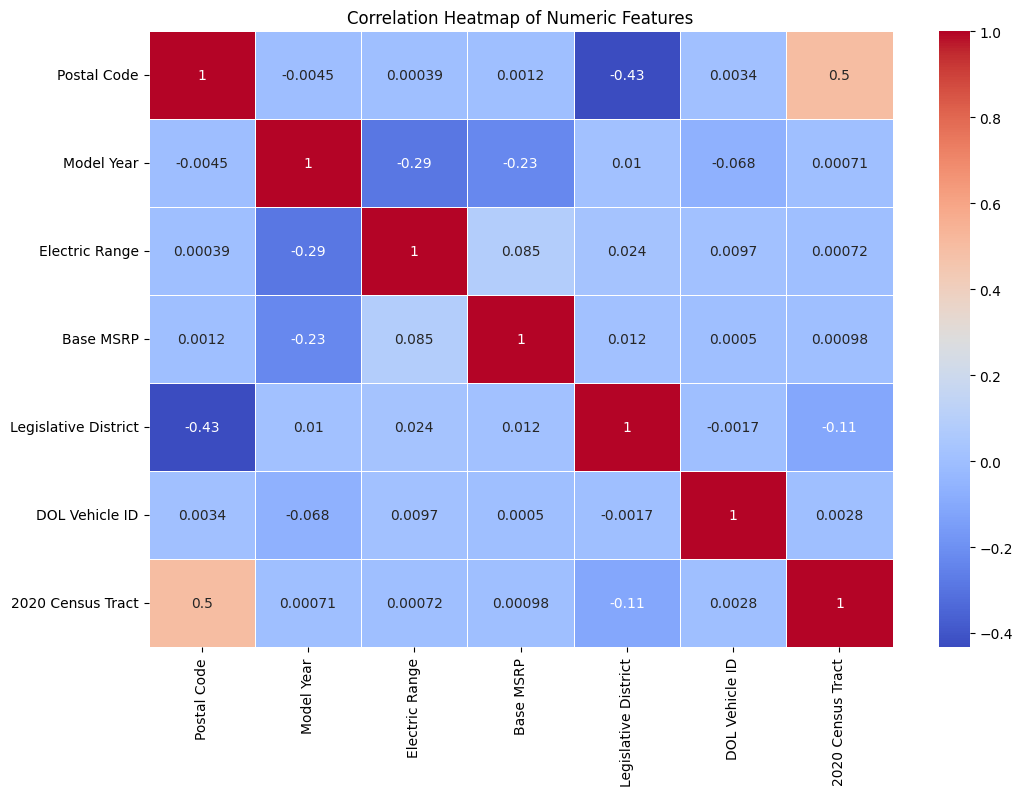

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Electric Vehicle Population by Model Year
plt.figure(figsize=(12, 8))
plt.scatter(df['Model Year'], df['Electric Vehicle Type'], color='blue', alpha=0.5)
plt.title('Electric Vehicle Population by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Type')
plt.grid(True)
plt.show()

# Using seaborn to plot Electric Vehicle Population by Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Model Year', y='Electric Vehicle Type', alpha=0.5)
plt.title('Electric Vehicle Population by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Type')
plt.grid(True)
plt.show()

# Plotting Electric Vehicle Population by Manufacturer
make_counts = df['Make'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(make_counts.index, make_counts.values, color='skyblue')
plt.xlabel('Electric Vehicle Manufacturer')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Population by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Electric Vehicle Range Histogram
data = df['Electric Range']
plt.hist(data, bins=20, color='green', edgecolor='black')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Electric Vehicle Range Histogram')
plt.show()

# Boxplot of Electric Range by Vehicle Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45, ha='right')
plt.show()

# Count Plot of Electric Vehicle Types
plt.figure(figsize=(12, 8))
sns.countplot(y='Electric Vehicle Type', hue='Electric Vehicle Type', data=df, palette='viridis', legend=False)
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.show()

# Line Plot of Electric Vehicle Population Over Model Years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Model Year', y='Base MSRP', hue='Electric Vehicle Type', errorbar=None)
plt.title('Electric Vehicle Population Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.grid(True)
plt.show()

# Heatmap of Correlations Between Numeric Features
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
